In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
from matplotlib import rc
import seaborn as sns
import glob 
font = {'family' : 'Helvetica','size'   : 9,'weight':  'normal'}
rc('font', **font)  # pass in the font dict as kwargs
o2 = np.array([253/256, 187/256, 132/256, 1])

In [2]:
H2_p=['Tyr17','Thr19','Arg22','Asn25','Tyr17.1','Thr19.1','Arg22.1','Asn25.1']
H2=['Tyr17','Thr19','Arg22','Asn25','Tyr17','Thr19','Arg22','Asn25']
spec_p=['Tyr17','Arg22','Tyr17.1','Arg22.1']
spec=['Tyr17','Arg22','Tyr17','Arg22']
hi_p=['ARG_50','LYS_58','ARG_385','LYS_393']
hi=['Arg51','Lys59','Arg51','Lys59']
all_p=['Leu6','Ser16','Tyr17','Thr19','Arg22','Asn25','Ser31','Thr34','Tyr47','Asn50','Gln54','Leu6.1','Ser16.1'
         ,'Tyr17.1','Thr19.1','Arg22.1','Asn25.1','Ser31.1','Thr34.1','Tyr47.1','Asn50.1','Gln54.1']
all_res=['Leu6','Ser16','Tyr17','Thr19','Arg22','Asn25','Ser31','Thr34','Tyr47','Asn50','Gln54','Leu6','Ser16'
         ,'Tyr17','Thr19','Arg22','Asn25','Ser31','Thr34','Tyr47','Asn50','Gln54']
H2_aa=['TYR_16','THR_18','ARG_21','ASN_24','TYR_351','THR_353','ARG_356','ASN_359']
spec_aa=['TYR_16','ARG_21','TYR_351','ARG_356']
hi_aa=['ARG_50','LYS_58','ARG_385','LYS_393']
Allr_aa=['LEU_5','SER_15','TYR_16','THR_18','ARG_21','ASN_24','SER_30','THR_33','TYR_46','ASN_49','GLN_53'
     ,'LEU_340','SER_350','TYR_351','THR_353','ARG_356','ASN_359','SER_365','THR_368','TYR_381','ASN_384','GLN_388']
dictionay_resCG=dict(zip(all_p,all_res))


In [3]:
#Get the CG specific complexes
FolderRspecific01A_cg = '/Users/mallu899/Mirror/projects/lacI_CG_master/data/TargetSite/R_ADNA/R_ADNA_01/'
FolderRspecific02A_cg = '/Users/mallu899/Mirror/projects/lacI_CG_master/data/TargetSite/R_ADNA/R_ADNA_02/'
FolderRspecific03A_cg = '/Users/mallu899/Mirror/projects/lacI_CG_master/data/TargetSite/R_ADNA/R_ADNA_03/'
FolderRspecific02B_cg = '/Users/mallu899/Mirror/projects/lacI_CG_master/data/TargetSite/R_BDNA/R_BDNA_02/'
FolderRspecific03B_cg = '/Users/mallu899/Mirror/projects/lacI_CG_master/data/TargetSite/R_BDNA/R_BDNA_03/'
FolderSspecific02A_cg = '/Users/mallu899/Mirror/projects/lacI_CG_master/data/TargetSite/S_ADNA/S_ADNA_02/'
FolderSspecific03A_cg = '/Users/mallu899/Mirror/projects/lacI_CG_master/data/TargetSite/S_ADNA/S_ADNA_03/'
FolderSspecific02B_cg = '/Users/mallu899/Mirror/projects/lacI_CG_master/data/TargetSite/S_BDNA/S_BDNA_02/'
FolderSspecific03B_cg = '/Users/mallu899/Mirror/projects/lacI_CG_master/data/TargetSite/S_BDNA/S_BDNA_03/'
#Get the CG non-specific complexes
FolderS02B_cg = '/Users/mallu899/Mirror/projects/lacI_CG_master/data/fullLength_txt/Ele_LowRep/S02/'
FolderS03B_cg = '/Users/mallu899/Mirror/projects/lacI_CG_master/data/fullLength_txt/Ele_LowRep/S03/'
FolderR02B_cg = '/Users/mallu899/Mirror/projects/lacI_CG_master/data/fullLength_txt/Ele_LowRep/R02/'
FolderR03B_cg = '/Users/mallu899/Mirror/projects/lacI_CG_master/data/fullLength_txt/Ele_LowRep/R03/'

In [4]:
FolderSspecific03A_cg

'/Users/mallu899/Mirror/projects/lacI_CG_master/data/TargetSite/S_ADNA/S_ADNA_03/'

In [5]:
def read_dis(file):
    """"Read the file and return the z coordiante (position along DNA-axis).
    
    Parameter
    ---------
    file: str
        path to input file
    Returns
    -------
    df['Z']: pandas DataFrame column
        position along the DNA axis"""
    
    df = pd.read_csv(file, sep='\s+',header=None,engine='python')
    df.rename(columns={0:'Z'},inplace=True)
    return(df['Z'])

def read_energy(file,name):
    """Reads the enery file and returns one column.
    
    Parameter
    ---------
    file: str
        path to input file
    name: str 
        either B-bonded, A-angle,DH-electrostatics,LJ-non-bonded, R-repulsion, El-protein-DNA electrostatics,
        and electristatics for protein helices:H1A,H2A...hiB.
    Returns
    -------
    df[name]: column of pandas Dataframe
        List of energy during the steps in the trajectory. The energy is specified by name."""
    
    df = pd.read_csv(file, sep='\s+',header=None,engine='python')
    df['total']=df[0]+df[1]+df[2]+df[3]+df[4]
        #df.rename(columns={0:'B',1:'A',2:'DH',3:'LJ',4:'R',6:'El'},inplace=True)
    df.rename(columns={0:'B',1:'A',2:'DH_all',3:'LJ',4:'R',6:'DH',12:'H1A',\
    14:'H2A',16:'H3A',18:'hiA',13:'H1B',15:'H2B',17:'H3B',19:'hiB'},inplace=True)
    return(df[name])

In [6]:
def filter_bound(positions,tobefiltered):
    """Get the index of the protein positioned on the target site (center is on 0 in Z direction)"""
    index_bound = positions[(-10 <= positions['Z']) & (positions['Z'] <= 10)].index
    Count_points = len(index_bound)
    "Filterout the data for those frames"
    tobefiltered_bound = tobefiltered.iloc[index_bound]
    return(tobefiltered_bound)

In [7]:
class plot_CG:
    """Plotting for the energies obtained form coarse-grained simulations.
    
    Methods
    -------
    energy_on_target(Folder,energy):
        Get only the energy for the frames where the protein is aligned with the taget site.
    contacts_on_target(folder,name,salt,model):
        Get only the specific contacts for the frames where the protein is aligned with the taget site."""
    
    def energy_on_target(folder,energy, replica = 5):
        """Read in the data for displacemnet and energies
        
        Parameters
        ----------
        folder: str
            path to input data
        energy: str
            type of energy to extract from EbyType*.dat
        Retruns
        -------
        data: list
            data extracted from EbyType*.dat
        """
        
        filesDis = glob.glob(folder+'*Displacement.txt')
        print(len(filesDis))
        filesEl = glob.glob(folder+'el/EbyType*.dat')
        #Get the IDs of the files to compare with the right electrostatics file"
        IDsDis = [filesDis[x][-24:-20] for x in list(range(replica))] #the ID is on position -24:-20 in the file name
        #Check for the right ID"
        p1 = []
        p2 = []
        for i in IDsDis:
            for file_D in filesDis:
                if i in file_D:
                    p1.append(file_D)
                    
            for file_e in filesEl:
                if i in file_e:
                    p2.append(file_e)
        #Get data for the frames on the target sequence"
        data = []
        for d,l in zip(p1,p2):
            #Read the data from the files and do the analysis."
            Disdata = pd.DataFrame(read_dis(d))
            Eldata = read_energy(l,energy)
            #Check if the protein is at the target site and filter out electrostatic energy for this frames."
            data.append(filter_bound(Disdata, Eldata))
        return(data)
    
    def contacts_on_target(folder,name,salt,model, replica = 5):    
        """Read the residues and to which extend they are formed
            Parameter
            ---------
            folder: str
                path to input data
            model: str
                define the model
            salt: int
                salt concentration
            name: str
                specifies the complex analysed for the column in the dataframe
            replica: int
                number of replica in folder. Default is 5.
            Returns
            -------
            dfs: list of pandas DataFrames
                one DataFrame per replica
            df: pandas DataFrame
                concatenation of all DataFrames for replica.
            """
        
        files_Con = glob.glob(folder+'*Occ.txt')
        filesDis = glob.glob(folder+'*Displacement.txt')

        #Get the IDs of the frames to compare with the right electrostatics file"
        IDsDis = [filesDis[x][-24:-20] for x in list(range(replica))]
        #Check for the right ID"
        position = []
        contacts = []
        for i in IDsDis:
            for file_D in filesDis:
                if i in file_D:
                    position.append(file_D) #odered files Displacement
            for file_e in files_Con:
                if i in file_e:
                    contacts.append(file_e) #ordered files Contacts

        dfs=[]
        sums=[]

        for i in range(len(position)):
            #Read the data from the files and do the analysis."
            position_n=position[i]
            contacts_n=contacts[i]
            disdata = pd.read_csv(position_n, sep='\s+',header=None,engine='python')
            disdata.rename(columns={0:'Z'},inplace=True)
            contactsdata = pd.read_csv(contacts_n, sep='\s+',header=0,engine='python')
            contacts_bound = filter_bound(disdata,contactsdata)
            dfs.append(contacts_bound)
            sum_df=pd.DataFrame(contacts_bound.sum())/len(contacts_bound.index)
            sum_df.rename(index=dictionay_resCG,inplace=True)
            replica=[i+1 for x in sum_df[0]]
            complex_=[name for x in sum_df[0]]
            Salt=[salt for x in sum_df[0]]
            Model=[model for x in sum_df[0]]
            sum_df['Replica']=replica
            sum_df['Complex']=complex_
            sum_df['Salt']=Salt
            sum_df['Model']=Model
            sum_df['Residue']=sum_df.index
            sum_df.rename(columns={0:'Occupancy'},inplace=True)
            sums.append(sum_df)

        df_sums=pd.concat([x for x in sums])
        return(dfs,df_sums)

In [8]:
def subset(data,subset):    
    """Use some a difined sibset of the specific contacts for plotting.
    
    Parameter
    ---------
    data: pandas DataFrame
        Occupancy	Replica	Complex	Salt	Model	Residue
    subset: list of strings
        defined the residues to for the output
        
    Retruns
    -------
    subset_df: pandas DataFrame
        Occupancy,Replica,Complex,Salt,Model,Residue
    """
    
    subset_df=data[data.index.isin(subset)]
    return(subset_df)

In [9]:
#plot_CG.energy_on_target(FolderSspecific03B_cg,'total')
plot_CG.energy_on_target(FolderRspecific03A_cg,'DH')

5


[0      -5.69
 1      -5.62
 2      -6.06
 3      -6.20
 4      -6.66
        ...  
 343    -9.60
 349   -11.28
 350   -10.27
 351   -10.29
 352   -10.98
 Name: DH, Length: 150, dtype: float64,
 0       -5.32
 1       -5.60
 2       -5.54
 3       -5.71
 4       -6.17
         ...  
 4902   -16.07
 4903   -15.16
 4904   -16.40
 4998   -15.63
 4999   -14.53
 Name: DH, Length: 1679, dtype: float64,
 0       -5.05
 1       -4.65
 2       -4.85
 3       -5.64
 4       -5.87
         ...  
 4995   -14.59
 4996   -15.04
 4997   -16.02
 4998   -15.52
 4999   -15.52
 Name: DH, Length: 4999, dtype: float64,
 0       -5.54
 1       -5.97
 2       -6.24
 3       -6.84
 4       -6.62
         ...  
 4995   -16.28
 4996   -17.72
 4997   -17.04
 4998   -17.61
 4999   -17.17
 Name: DH, Length: 4986, dtype: float64,
 0       -5.94
 1       -6.09
 2       -7.29
 3       -7.58
 4       -7.21
         ...  
 4973   -15.39
 4974   -14.96
 4975   -14.96
 4976   -15.32
 4977   -14.75
 Name: DH, Length: 2931

In [10]:
def get_energy_from_CG_file(folder,model,salt,energy_specifier):
    """Read in the data for displacemnet and energies.
    
    Parameter
    ---------
    folder: str
        path to input data
    model: str
        define the model
    salt: int
        salt concentration
    energy_specifier: str
        specififes which kind of energy to obtain from the energy output of the simulation
        
    Retuns
    ------
    get_energy_from_CG_file: pandas DataFrame
        energy,ind,Complex,Salt,DNA"""
    
    filesEl = glob.glob(folder+'EbyType*.dat')
    "Get the IDs of the files to compare with the right electrostatics file"
    "Check for the right ID"
    energy=[]
    replica=[]
    for i in range(len(filesEl)):
        energy.append(read_energy(filesEl[i],energy_specifier)[10000:49999])
        replica.append([i+1 for x in energy[i]])
    pp=pd.concat([x for x in energy])
    replica_=[x for y in replica for x in y]
    print((len(pp),len(replica_)))
    df_energy_and_details=pd.DataFrame({'energy':pp,'ind':replica_,'Complex':[model for x in pp],\
                                        'Salt':[salt for x in pp],'DNA':['nonspecific' for x in pp]})
    return(df_energy_and_details)

In [11]:
nonspec_S_cg=get_energy_from_CG_file(FolderS03B_cg,'S_',0.03,'total')
nonspec_R_cg=get_energy_from_CG_file(FolderR03B_cg,'R_',0.03,'total')
#Get the mean total energy for non-specific complexes
S_total=nonspec_S_cg.groupby('Salt').mean()
R_total=nonspec_R_cg.groupby('Salt').mean()

(199995, 199995)
(199995, 199995)


In [12]:
def get_energy_dataframe(folder,comp,salt,energy='DH',start=None,end=None):
    """Get the energies on the target site for several replica.
    
    Parameter
    ---------
    folder: str
        path to input data
    model: str
        define the model
    salt: int
        salt concentration
    energy_specifier: str
        specififes which kind of energy to obtain from the energy output of the simulation
    
    Returns
    -------
    appended: list of pandas DataFrames
        [DH ,ind,Complex,Salt] for each replica
    """
    
    replica=plot_CG.energy_on_target(folder,energy)
    first=pd.DataFrame(replica[0])
    first['ind']=[1 for j in (range(len(replica[0])))]
    first['Complex']=[comp for j in (range(len(replica[0])))]
    first['Salt']=[salt for j in (range(len(replica[0])))]
    for i in range(len(replica)-1):
        next_=pd.DataFrame(replica[i+1])
        next_['ind']=[i+2 for j in (range(len(next_)))]
        next_['Complex']=[comp for j in (range(len(next_)))]
        next_['Salt']=[salt for j in (range(len(next_)))]
        appended=first.append(next_)
        first=appended
        
    return(appended)

5
5
5
5


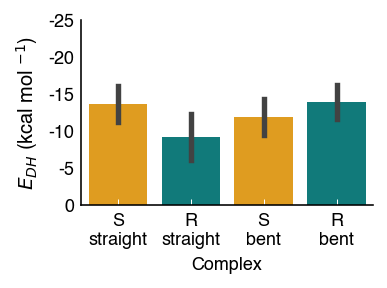

In [13]:
#Electrostatics
all_comp_CG_DH=[get_energy_dataframe(FolderSspecific03B_cg,'S_','0.03'),\
                get_energy_dataframe(FolderRspecific03B_cg,'R_','0.03'),\
get_energy_dataframe(FolderSspecific03A_cg,'S:','0.03'),\
                get_energy_dataframe(FolderRspecific03A_cg,'R:','0.03')]
data_CG_DH=pd.concat([x for x in all_comp_CG_DH])
data_CG_DH.replace({'S_':'S\nstraight','R_':'R\nstraight',\
                          'S:':'S\nbent','R:':'R\nbent',},inplace=True)
data_CG_DH['Model']=['CG' for x in range(len(data_CG_DH))]

fig, ax = plt.subplots(figsize = (2.8,2.1))
data_CG_DH['DH']=-data_CG_DH['DH']

sns.barplot(y='DH',x='Complex',data=data_CG_DH,palette=['orange','darkcyan','orange','darkcyan'],ci="sd")

#sns.barplot(y='DH',data=allc_join,x='Complex',linewidth=0.9,hue='Model',palette="Set1",orient="v", capsize=.2)

ax.tick_params(

        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=True,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=True,
        right=False, left=True, labelleft=True,
        width = 0.5,
        length = 3, color='white',direction ='in')
plt.ylabel('$E_{DH}$ (kcal mol $^{-1}$)',fontsize=10,color='k')
#plt.xticks(rotation=38,fontsize=14)
plt.yticks([0,5,10,15,20,25],[-0,-5,-10,-15,-20,-25])#,fontsize=14,color='white')
plt.legend([],[], frameon=False)
sns.despine()
plt.tight_layout()

plt.savefig('/Users/mallu899/Mirror/projects/lacI_CG_master/LacI_CG_Draft/Figures/version10/Figure5/energy_dh',dpi=300,transparent=True)

5
5
5
5


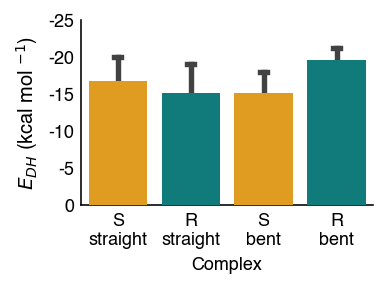

In [26]:
#Electrostatics
all_comp_CG_DH=[get_energy_dataframe(FolderSspecific02B_cg,'S_','0.02'),\
                get_energy_dataframe(FolderRspecific02B_cg,'R_','0.02'),\
get_energy_dataframe(FolderSspecific02A_cg,'S:','0.02'),\
                get_energy_dataframe(FolderRspecific02A_cg,'R:','0.02')]
data_CG_DH=pd.concat([x for x in all_comp_CG_DH])
data_CG_DH.replace({'S_':'S\nstraight','R_':'R\nstraight',\
                          'S:':'S\nbent','R:':'R\nbent',},inplace=True)
data_CG_DH['Model']=['CG' for x in range(len(data_CG_DH))]
data_CG_DH['DH']=-data_CG_DH['DH']

fig, ax = plt.subplots(figsize = (2.8,2.1))
sns.barplot(y='DH',x='Complex',data=data_CG_DH,palette=['orange','darkcyan','orange','darkcyan'],ci="sd",\
           zorder=5,capsize=0.1)

ax.tick_params(

        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=True,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=True,
        right=False, left=True, labelleft=True,
        width = 0.5,
        length = 3, color='white',direction ='in')
plt.ylabel('$E_{DH}$ (kcal mol $^{-1}$)',fontsize=10,color='k')
#plt.xticks(rotation=38,fontsize=14)
plt.yticks([0,5,10,15,20,25],[-0,-5,-10,-15,-20,-25])#,fontsize=14,color='white')
#plt.yticks(fontsize=14,color='white')
plt.legend([],[], frameon=False)
sns.despine()
plt.tight_layout()
#plt.ylim(-38,1)
plt.savefig('/Users/mallu899/Mirror/projects/lacI_CG_master/LacI_CG_Draft/Figures/version10/Figure5/energy_dh_002',dpi=300,transparent=True)

In [15]:
plot_CG.contacts_on_target(FolderSspecific03A_cg,'S:','0.03','CG')[1]

,Occupancy,Replica,Complex,Salt,Model,Residue
Leu6,0.000000,1,S:,0.03,CG,Leu6
Ser16,0.000000,1,S:,0.03,CG,Ser16
Tyr17,0.084727,1,S:,0.03,CG,Tyr17
Thr19,0.000000,1,S:,0.03,CG,Thr19
Arg22,0.000000,1,S:,0.03,CG,Arg22
...,...,...,...,...,...,...
Ser31,0.000000,5,S:,0.03,CG,Ser31
Thr34,0.000000,5,S:,0.03,CG,Thr34
Tyr47,0.000000,5,S:,0.03,CG,Tyr47
Asn50,0.000000,5,S:,0.03,CG,Asn50


In [17]:
occ_R01=plot_CG.contacts_on_target(FolderRspecific01A_cg,'R:','0.01','CG', replica=3)[1]

In [18]:
occ_R01

,Occupancy,Replica,Complex,Salt,Model,Residue
Leu6,0.8402,1,R:,0.01,CG,Leu6
Ser16,0.5458,1,R:,0.01,CG,Ser16
Tyr17,0.6058,1,R:,0.01,CG,Tyr17
Thr19,0.6606,1,R:,0.01,CG,Thr19
Arg22,0.8494,1,R:,0.01,CG,Arg22
...,...,...,...,...,...,...
Ser31,0.4932,3,R:,0.01,CG,Ser31
Thr34,0.5032,3,R:,0.01,CG,Thr34
Tyr47,0.8418,3,R:,0.01,CG,Tyr47
Asn50,0.5252,3,R:,0.01,CG,Asn50


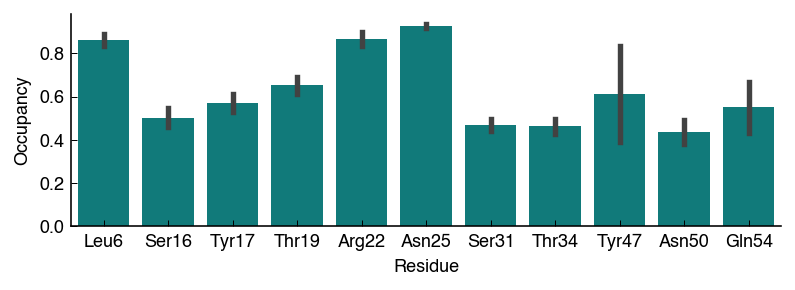

In [19]:
fig, ax = plt.subplots(figsize = (5.6,2.1))
sns.barplot(x='Residue',y='Occupancy',data=subset(occ_R01,all_p),palette=['darkcyan'],ci="sd")


ax.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=True,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=True,
        right=False, left=True, labelleft=True,
        width = 0.5,
        length = 3, color='k',direction ='in')
sns.despine()
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.savefig('/Users/mallu899/Mirror/projects/lacI_CG_master/LacI_CG_Draft/Figures/version10/Figure5/CG_Con-specific_split.png',dpi=300,bbox_inches='tight', transparent=True)     

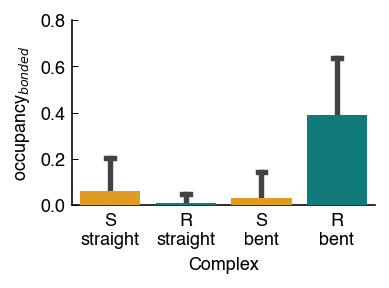

In [25]:
tt_RA=plot_CG.contacts_on_target(FolderRspecific03A_cg,'R:','0.03','CG')[1]
tt_SA=plot_CG.contacts_on_target(FolderSspecific03A_cg,'S:','0.03','CG')[1]
tt_SB=plot_CG.contacts_on_target(FolderSspecific03B_cg,'S_','0.03','CG')[1]
tt_RB=plot_CG.contacts_on_target(FolderRspecific03B_cg,'R_','0.03','CG')[1]
tt_SA.replace({np.inf:0},inplace=True)
tt_SB.replace({np.inf:0},inplace=True)
tt_RA.replace({np.inf:0},inplace=True)
tt_RB.replace({np.inf:0},inplace=True)
tt=pd.concat([tt_SB,tt_RB,tt_SA,tt_RA])
tt.replace({'S_':'S\nstraight','R_':'R\nstraight',\
                          'S:':'S\nbent','R:':'R\nbent',},inplace=True)
fig, ax = plt.subplots(figsize = (2.8,2.1))

sns.barplot(x='Complex',y='Occupancy',data=subset(tt,all_p),\
            palette=['orange','darkcyan','orange','darkcyan'],ci="sd",zorder=5,capsize=0.1)

ax.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=True,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=True,
        right=False, left=True, labelleft=True,
        width = 0.5,
        length = 3, color='k',direction ='in')

sns.despine()
plt.legend([],[], frameon=False)

plt.ylabel('occupancy$_{bonded}$')
plt.ylim([-0.0,0.8])
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.savefig('/Users/mallu899/Mirror/projects/lacI_CG_master/LacI_CG_Draft/Figures/version10/Figure5/CG_Con-2.png',dpi=300,bbox_inches='tight', transparent=True)              

In [ ]:
fig, ax = plt.subplots(figsize = (5.6,2.1))

sns.barplot(y='Occupancy',data=tt,x='Residue',linewidth=0.9,hue='Complex',palette=['orange','darkcyan','orange','darkcyan'],ci="sd")
ax.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=True,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=True,
        right=False, left=True, labelleft=True,
        width = 0.5,
        length = 3, color='k',direction ='in')
sns.despine()
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.savefig('/Users/mallu899/Mirror/projects/lacI_CG_master/LacI_CG_Draft/Figures/version10/Figure5/CG_Con-003_split.png',dpi=300,bbox_inches='tight', transparent=True)      

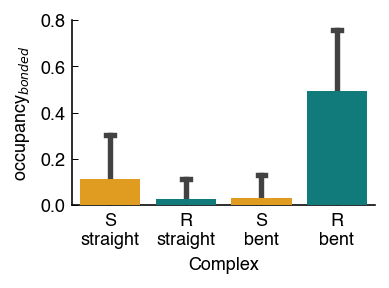

In [28]:
tt_RA=plot_CG.contacts_on_target(FolderRspecific02A_cg,'R:','0.02','CG')[1]
tt_SA=plot_CG.contacts_on_target(FolderSspecific02A_cg,'S:','0.02','CG')[1]
tt_SB=plot_CG.contacts_on_target(FolderSspecific02B_cg,'S_','0.02','CG')[1]
tt_RB=plot_CG.contacts_on_target(FolderRspecific02B_cg,'R_','0.02','CG')[1]
tt_SA.replace({np.inf:0},inplace=True)
tt_SB.replace({np.inf:0},inplace=True)
tt_RA.replace({np.inf:0},inplace=True)
tt_RB.replace({np.inf:0},inplace=True)
tt=pd.concat([tt_SB,tt_RB,tt_SA,tt_RA])
tt.replace({'S_':'S\nstraight','R_':'R\nstraight',\
                          'S:':'S\nbent','R:':'R\nbent',},inplace=True)

fig, ax = plt.subplots(figsize = (2.8,2.1))

sns.barplot(x='Complex',y='Occupancy',data=subset(tt,all_p),\
            palette=['orange','darkcyan','orange','darkcyan'],ci="sd",zorder=5,capsize=0.1)

ax.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=True,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=True,
        right=False, left=True, labelleft=True,
        width = 0.5,
        length = 3, color='k',direction ='in')
plt.ylim([-0.0,0.8])

sns.despine()
plt.legend([],[], frameon=False)

plt.ylabel('occupancy$_{bonded}$')

plt.legend([],[], frameon=False)
plt.tight_layout()
plt.savefig('/Users/mallu899/Mirror/projects/lacI_CG_master/LacI_CG_Draft/Figures/version10/Figure5/CG_Con-2_002.png',dpi=300,bbox_inches='tight', transparent=True)  

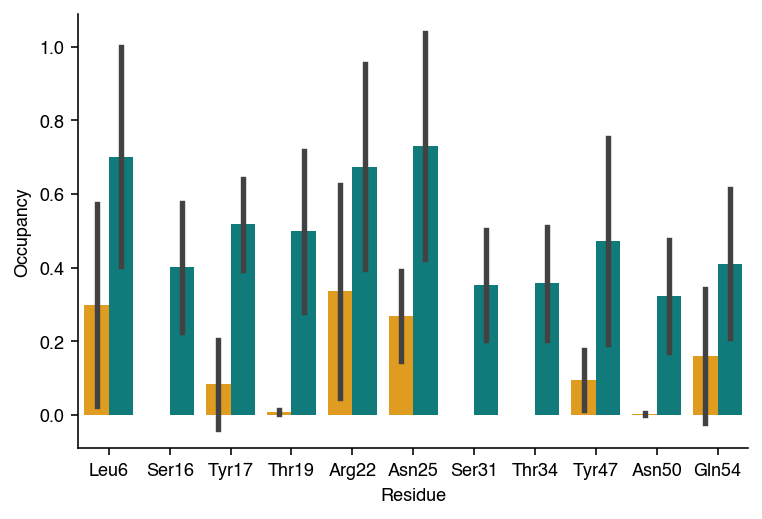

In [29]:
tb=pd.concat([tt_SB,tt_RA])
tb.replace({'S_':'S\nstraight','R:':'R\nbent',},inplace=True)
sns.barplot(y='Occupancy',data=tb,x='Residue',linewidth=0.9,hue='Complex',palette=['orange','darkcyan','orange','darkcyan'],ci="sd")
ax.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=True,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=True,
        right=False, left=True, labelleft=True,
        width = 0.5,
        length = 3, color='k',direction ='in')
sns.despine()
plt.legend([],[], frameon=False)

In [ ]:
fig, ax = plt.subplots(figsize = (5.6,2.1))

sns.barplot(y='Occupancy',data=tt,x='Residue',linewidth=0.9,hue='Complex',palette=['orange','darkcyan','orange','darkcyan'],ci="sd")
ax.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=True,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=True,
        right=False, left=True, labelleft=True,
        width = 0.5,
        length = 3, color='k',direction ='in')
sns.despine()
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.savefig('/Users/mallu899/Mirror/projects/lacI_CG_master/LacI_CG_Draft/Figures/version10/Figure5/CG_Con-002_split.png',dpi=300,bbox_inches='tight', transparent=True)              

In [ ]:
sns.boxplot(y='Occupancy',data=tt,x='Residue',linewidth=0.9,hue='Complex',palette=['orange','cyan','gold','darkcyan'])
ls
